<h1 align="center">Old Car Price Prediction</h1>


In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# 1) Data Loading

In [654]:
df = pd.read_csv('/content/old car sales data.csv')

# 2) Understanding the Data


In [655]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


As we can see above df.info()

*   The dataset has 15,411 rows and 14 columns.
*   No null values are present in any of the columns.
*   The data types are a mix of int64, float64, and object.




In [657]:
# Separating numerical and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include='object').columns

In [658]:
print("Numerical Features:")
print(numeric_features)

print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
Index(['Unnamed: 0', 'vehicle_age', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'selling_price'],
      dtype='object')

Categorical Features:
Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')


###Undestanding Categorical Features

In [659]:
# Unique values and Percentage distribution
for col in categorical_features:
    print(f"\nColumn: {col}")
    print("Unique Values:", df[col].nunique())
    print("Value Counts (with percentage):")
    print(df[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


Column: car_name
Unique Values: 121
Value Counts (with percentage):
car_name
Hyundai i20              5.88%
Maruti Swift Dzire       5.78%
Maruti Swift             5.07%
Maruti Alto              5.05%
Honda City               4.91%
                         ...  
Mercedes-AMG C           0.01%
Rolls-Royce Ghost        0.01%
Maserati Quattroporte    0.01%
Isuzu MUX                0.01%
Force Gurkha             0.01%
Name: proportion, Length: 121, dtype: object

Column: brand
Unique Values: 32
Value Counts (with percentage):
brand
Maruti           32.39%
Hyundai          19.35%
Honda             9.64%
Mahindra          6.56%
Toyota            5.15%
Ford              5.13%
Volkswagen        4.02%
Renault           3.48%
BMW               2.85%
Tata              2.79%
Mercedes-Benz     2.19%
Skoda             2.17%
Audi              1.25%
Datsun             1.1%
Jaguar            0.38%
Land Rover        0.33%
Jeep              0.27%
Kia               0.21%
Porsche           0.14%
Volvo    

In [660]:
print('Summary Statistics of categorical features:')
print('-'*100)
df.describe(include= 'object')

Summary Statistics of categorical features:
----------------------------------------------------------------------------------------------------


,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


###Understanding Numercal Features

In [661]:
print('Summary Statistics of numerical features:')
print('-'*100)
df.describe()

Summary Statistics of numerical features:
----------------------------------------------------------------------------------------------------


,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


# 3) Data Cleaning

We are dropping Unnamed: 0 because it’s just a duplicate index column and does not carry any relevant feature information.

In [662]:
# Droping the Unnamed: 0 column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [663]:
df.head(3)

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796,46.3,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197,82.0,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.0,1197,80.0,5,215000


In [664]:
# Updating numerical and categorical columns again
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include='object').columns

# 4) Exploratory Data Analysis

## 4.1 Univariate Analysis

### Numerical Features

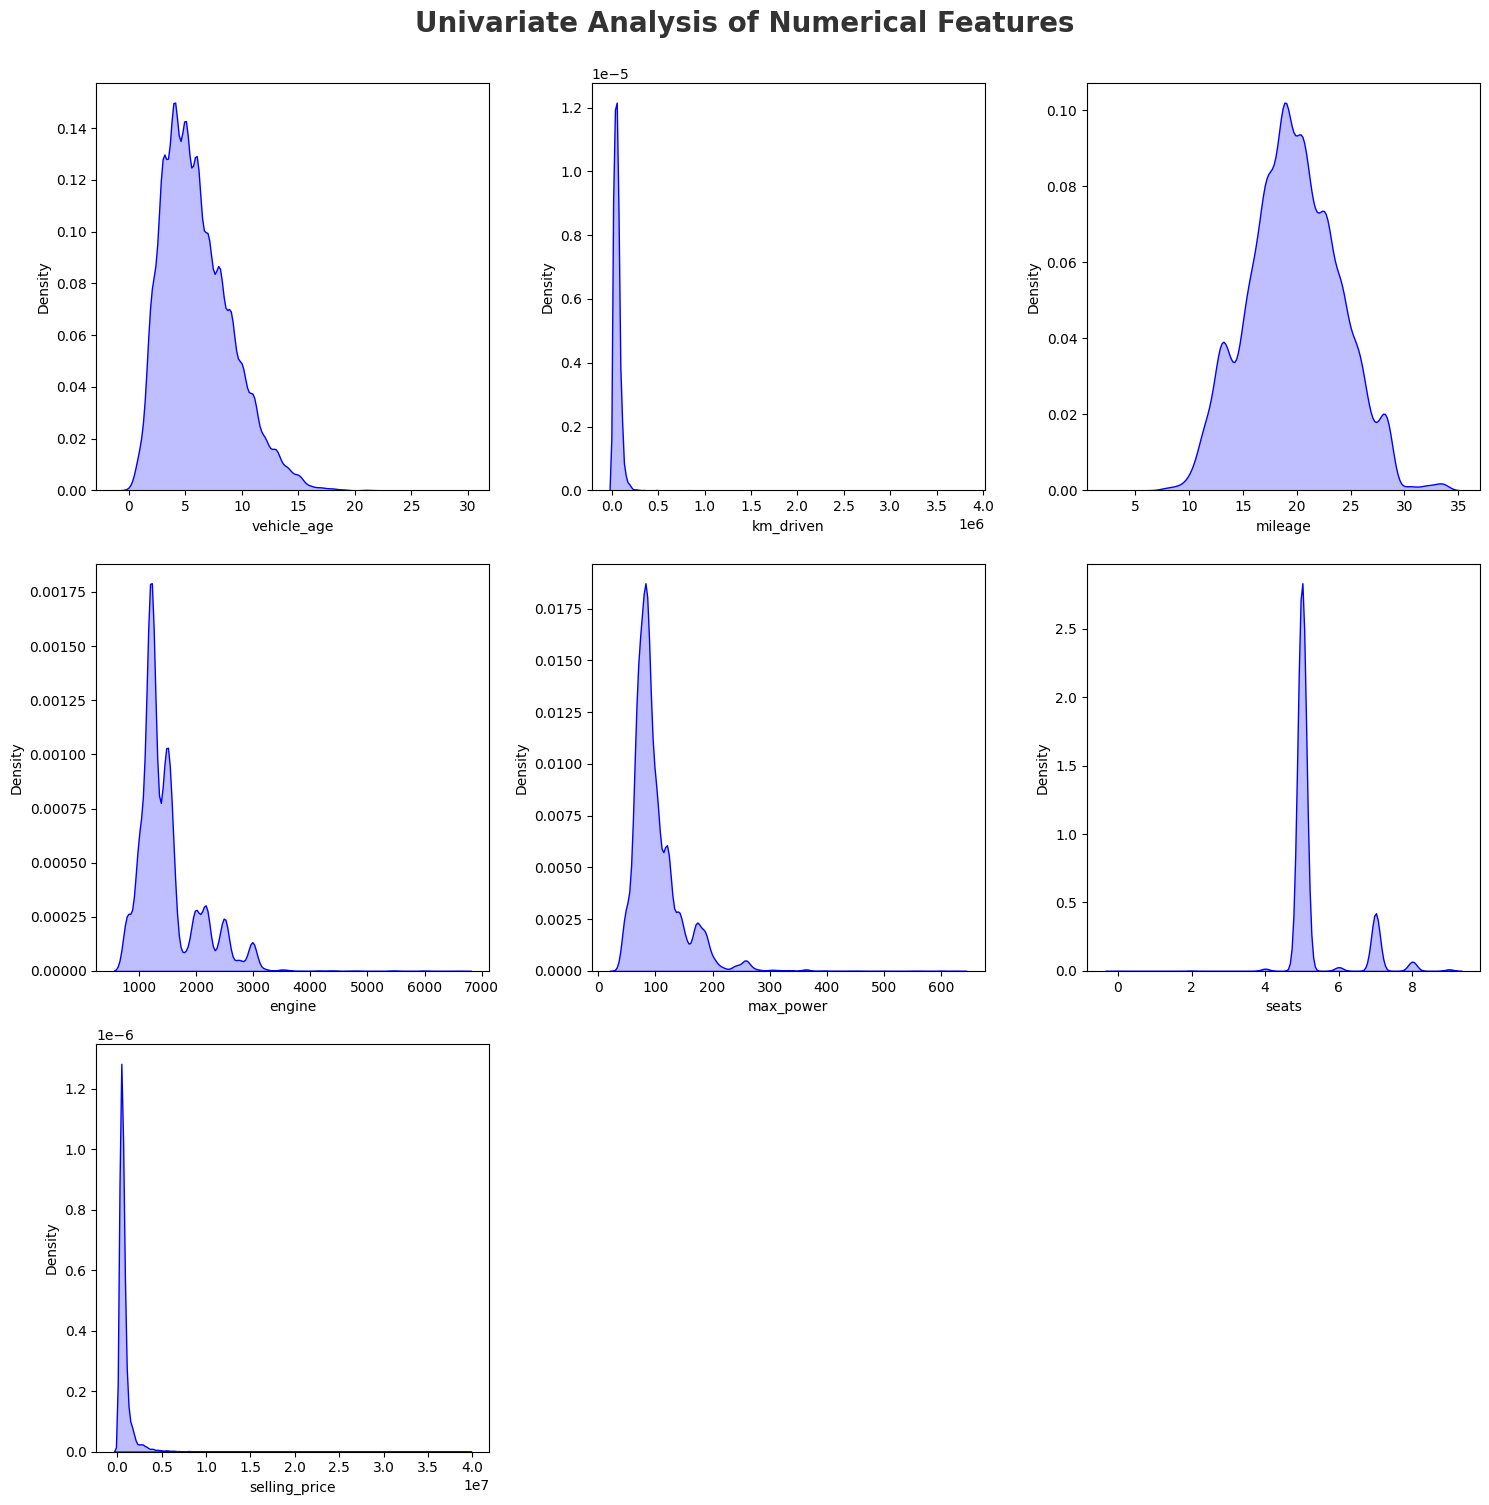

In [665]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [666]:
#Checking skewness of all numerical features
for col in numeric_features:
  print(f"{col} : {df[col].skew()}")


vehicle_age : 0.8337120214365826
km_driven : 28.172710872110212
mileage : 0.10496103450949668
engine : 1.666466626105951
max_power : 2.485129431649049
seats : 2.0399825131714278
selling_price : 10.047047978435213


as we can see above result of Skewness

* **vehicle_age	0.83 :** Mildly right-skewed - most vehicles are relatively newer, fewer older vehicles.
* **km_driven	28.17 :**	Highly right-skewed - a few vehicles have been driven much more than others (potential outliers).
* **mileage	0.10 :**	Very close to 0 - approximately symmetric distribution.
* **engine	1.67 :** 	Moderately right-skewed - smaller engines are more common.
* **max_power	2.49 :**	Strong right skew - most vehicles have lower power, with a few high-powered ones.
* **seats	2.04 :**	Right-skewed - most vehicles are 5-seaters, a few have more.
* **selling_price	10.05 :**	Heavily right-skewed - most cars are affordable, a few luxury vehicles skew the distribution.

As we can see, several features are highly right-skewed, especially:

* km_driven
* engine
* max_power
* seats
* selling_price

To normalize their distributions, we can apply transformations like:

* Log transformation
* Box-Cox transformation
* Yeo-Johnson transformation

These are particularly helpful for models that are sensitive to skewness, such as Linear Regression, K-Nearest Neighbors (KNN). But we will see this later.

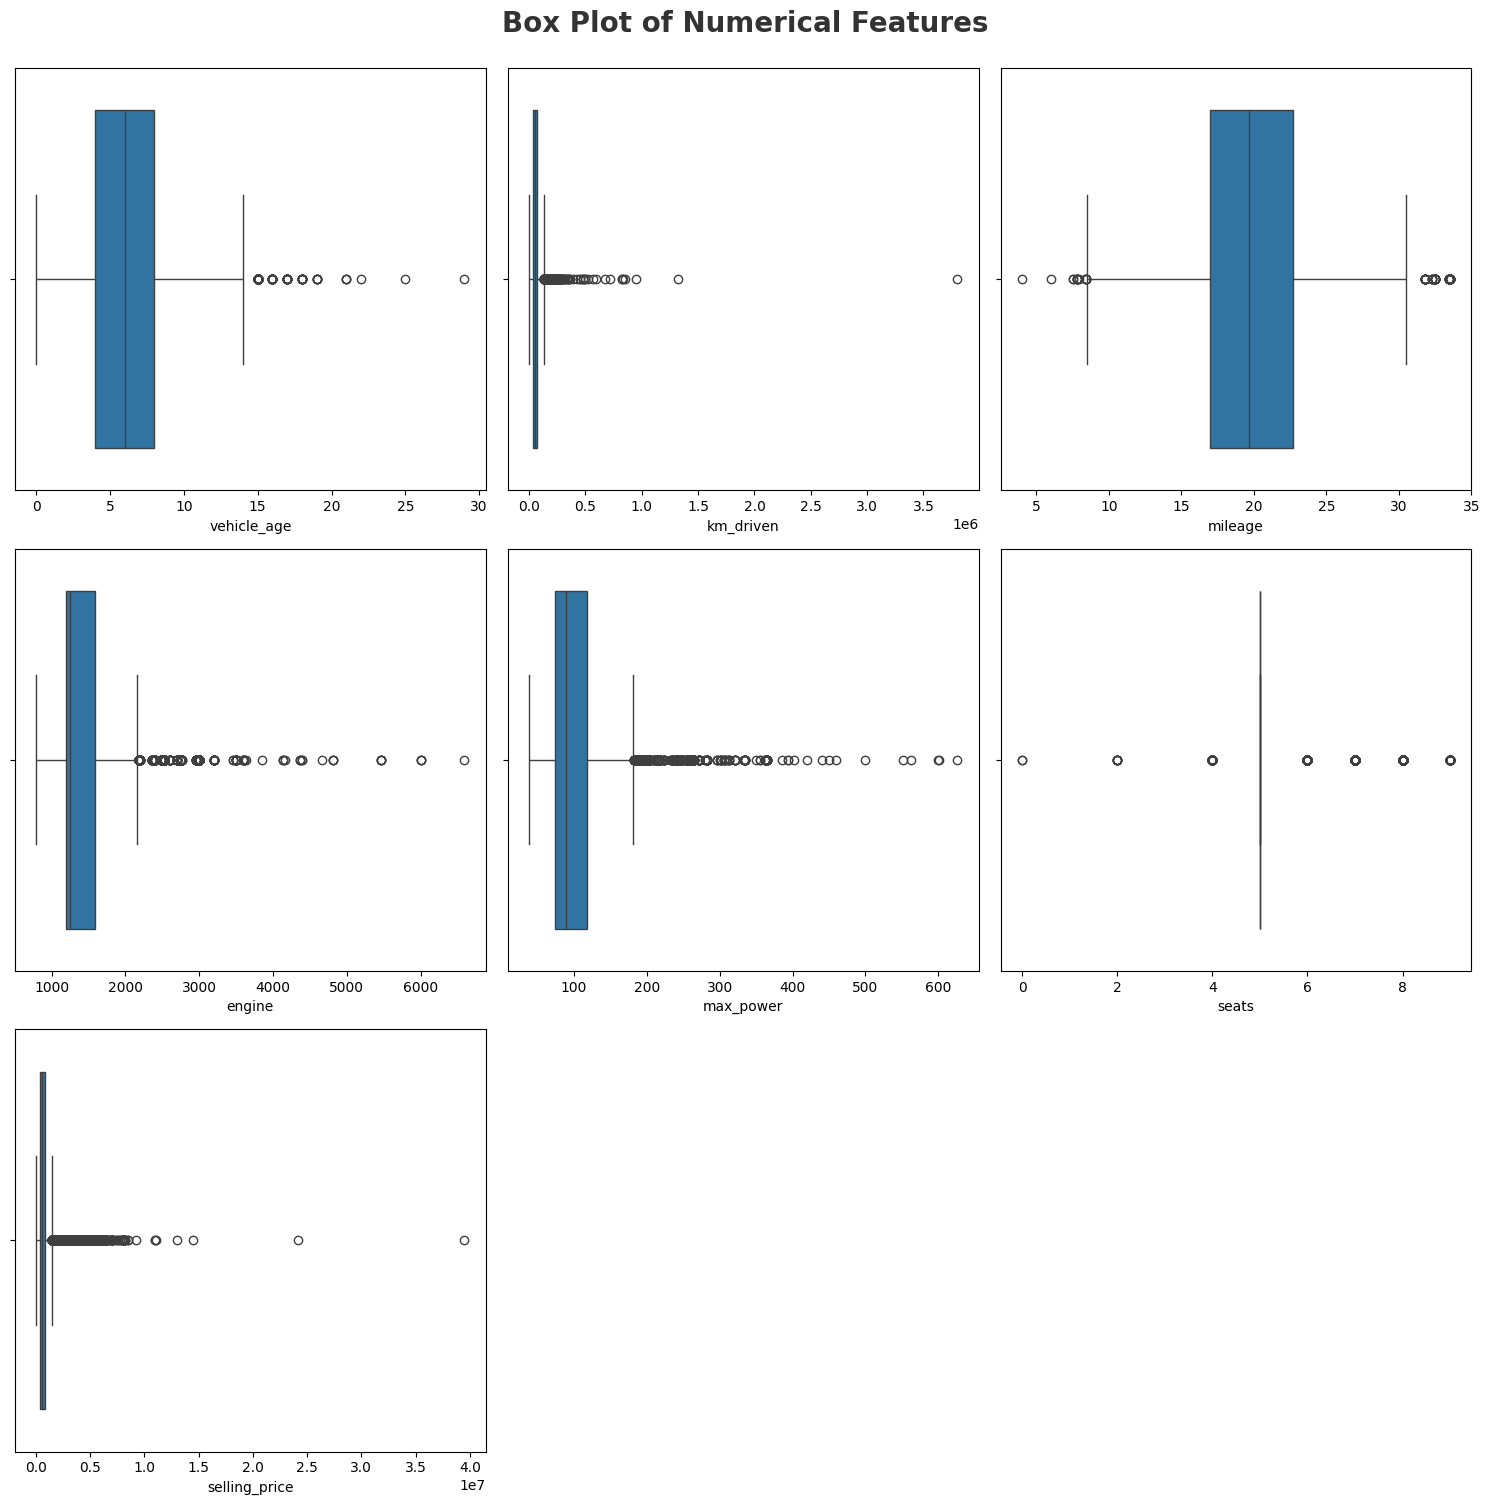

In [667]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Conclusion of Box Plot

As we can see from the boxplots, there are noticeable outliers in km_driven, engine, selling_price, and max_power.

However, it's important to note that outliers are not always bad — they may represent genuine variations in the data (e.g., luxury cars or high-mileage vehicles).

We will analyze these outliers in more detail later to understand their nature and impact during model building.



### Categorical Features

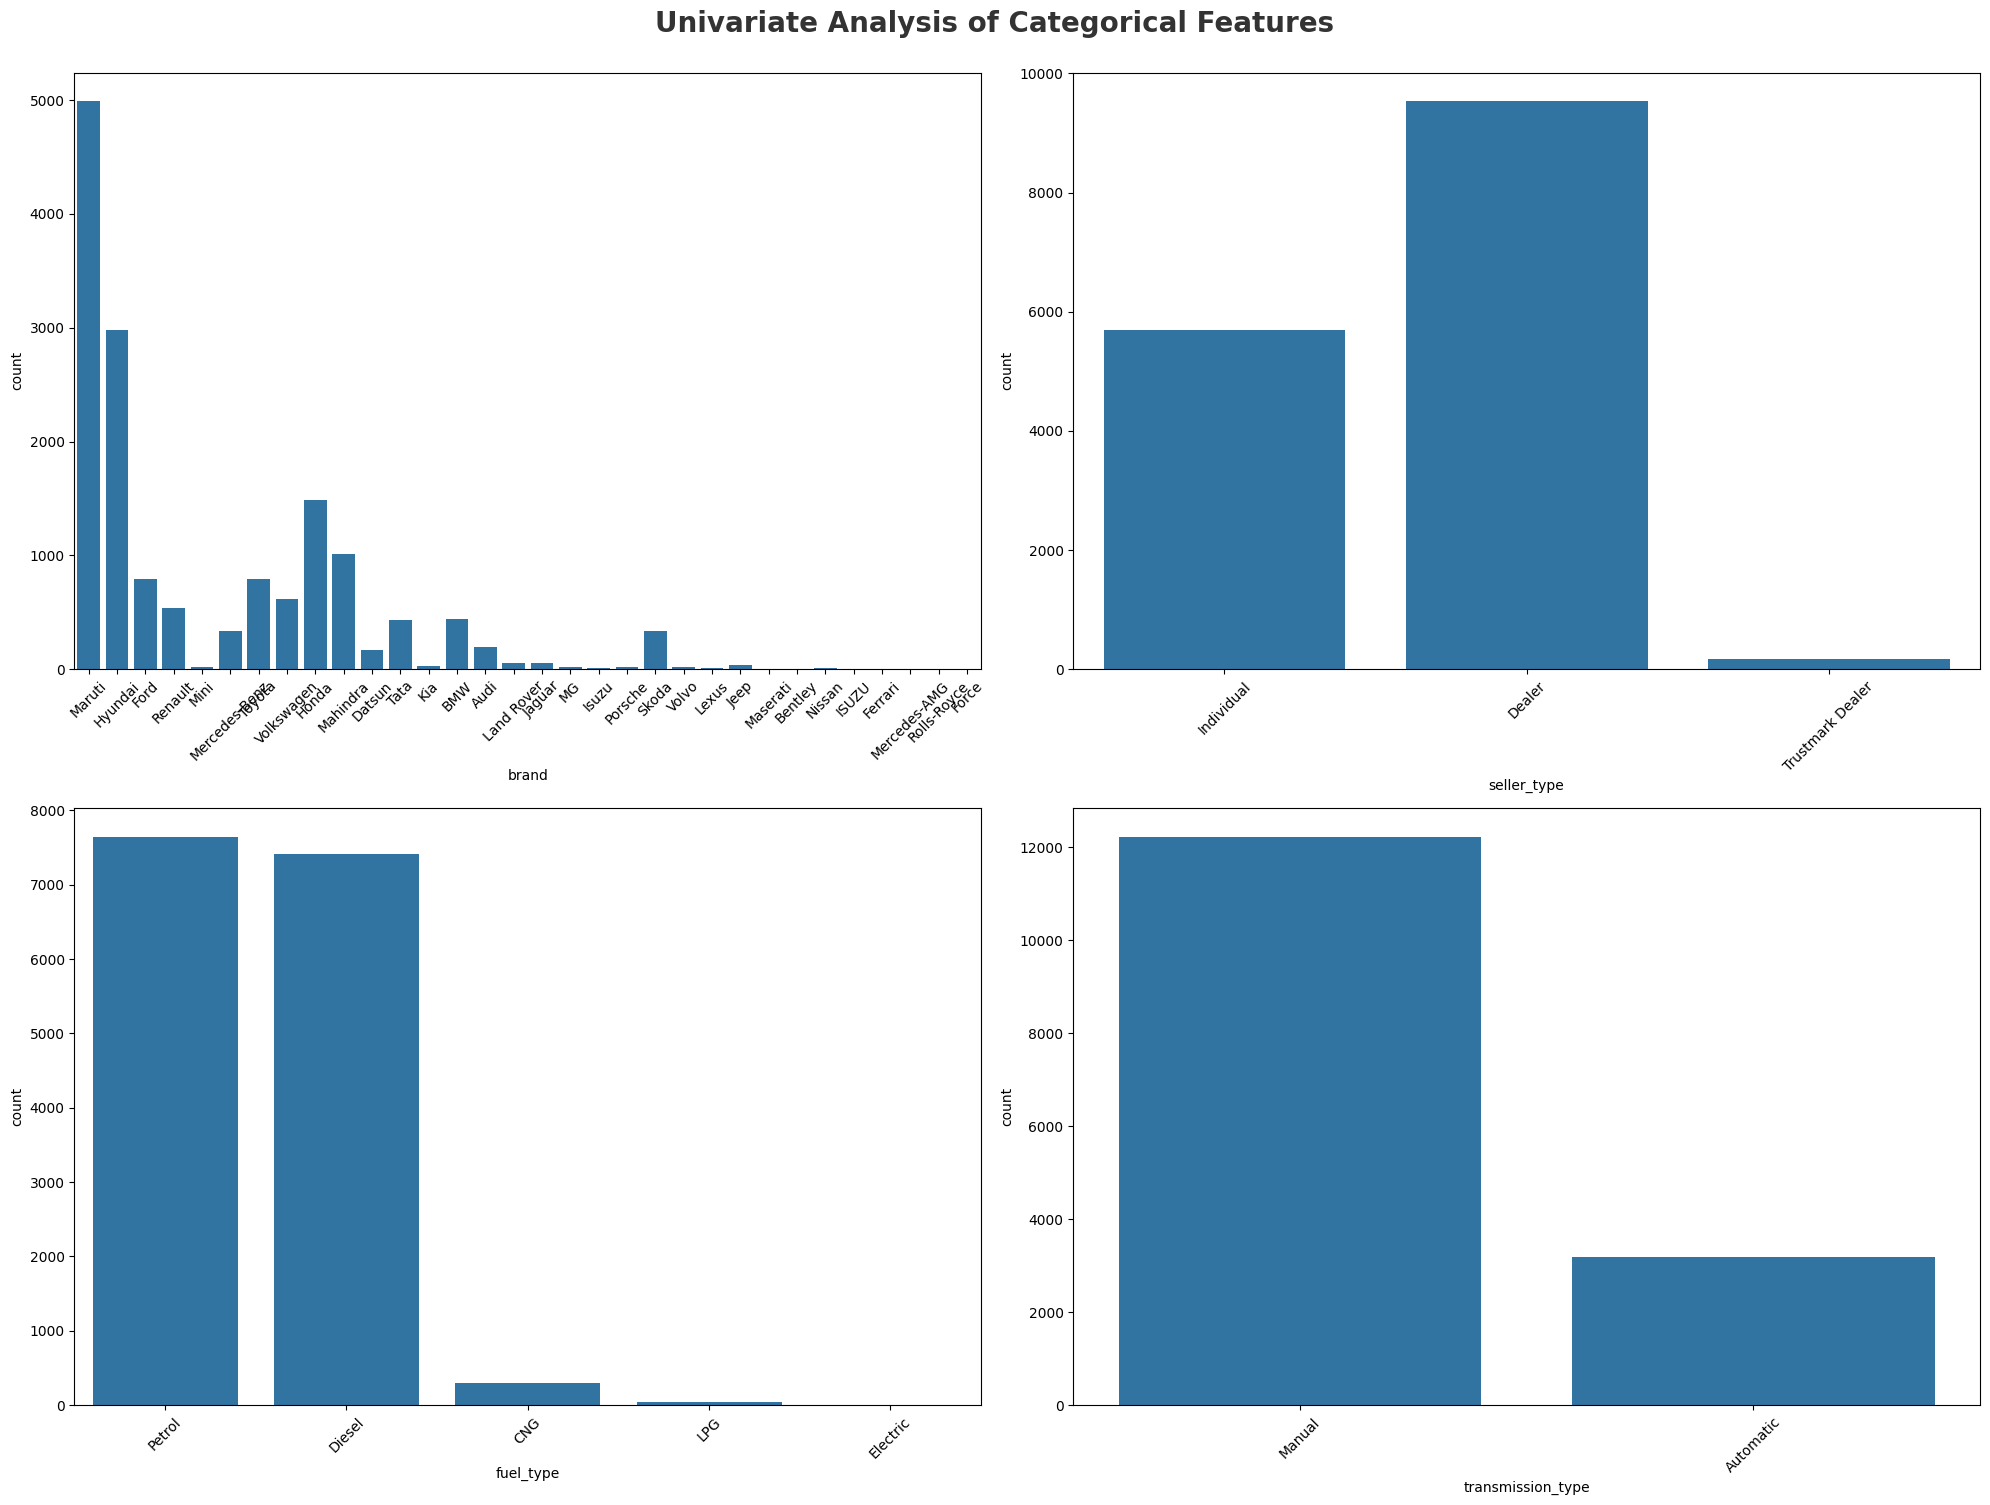

In [668]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## 4.2 Bivariate Analysis

####Bivariate Analysis: Numeric continius Features vs Selling Price

In [669]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


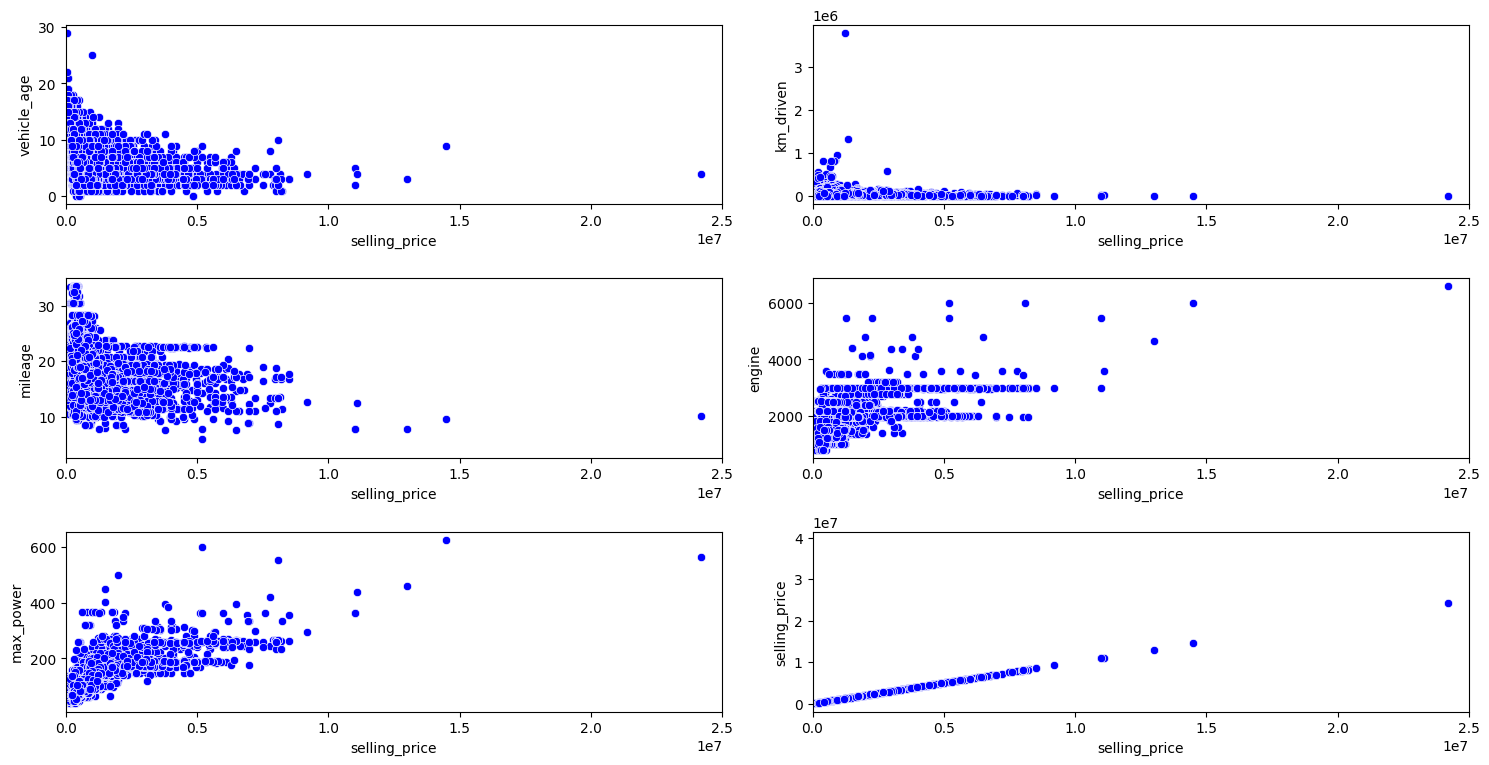

In [670]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

#### Key points
As we can see, lower vehicle age is associated with higher selling prices, indicating that newer vehicles tend to retain more value. Similarly, engine capacity (CC) has a positive impact on price — vehicles with larger engines, particularly above 2000cc, are generally priced higher, while those with engine capacity below 2000cc mostly fall under the ₹5 lakh range. On the other hand, kilometers driven shows a negative correlation with selling price; the more a vehicle has been driven, the lower its resale value tends to be. Additionally, from the correlation matrix, we observe that features like engine and max_power are highly correlated, suggesting the presence of multicollinearity. This should be considered during model building, especially for algorithms like linear regression that are sensitive to such relationships.

## 4.3 Multivariate Analysis

####Correlation Analysis Numeric Features

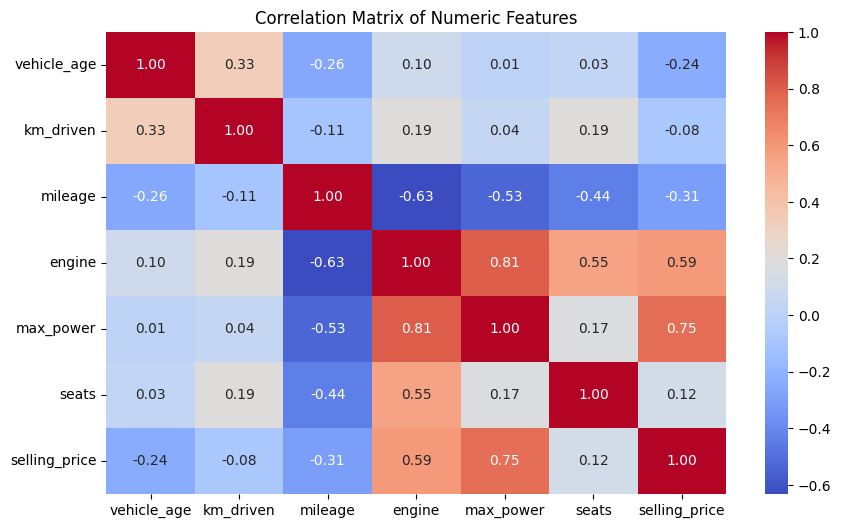

In [671]:
# Correlation matrix of numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

 **Strong Correlations Observed:**

* engine and max_power (0.81): Very strong positive correlation.

* engine and seats (0.55) and mileage and engine (-0.63): Also moderately strong.

* mileage and max_power (-0.53): Negative but still strong correlation.


**Implications:**

These high correlations suggest multicollinearity is present, especially between:

* engine ↔ max_power

* engine ↔ mileage

**Recommendation:**

Consider dropping one of the correlated features (e.g., drop engine or max_power) or apply dimensionality reduction (like PCA) if using models sensitive to multicollinearity.

For tree-based models (like Random Forest or XGBoost), multicollinearity is less of a concern.

But we will see later during model building

## Most Sold Cars

In [672]:
print('-'*50)
print('Top 10 Sold Cars')
print('-'*50)

df.car_name.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars
--------------------------------------------------


,count
car_name,
Hyundai i20,906
Maruti Swift Dzire,890
Maruti Swift,781
Maruti Alto,778
Honda City,757
Maruti Wagon R,717
Hyundai Grand,580
Toyota Innova,545
Hyundai Verna,492


- Most Selling Used Car is Hyundai i20

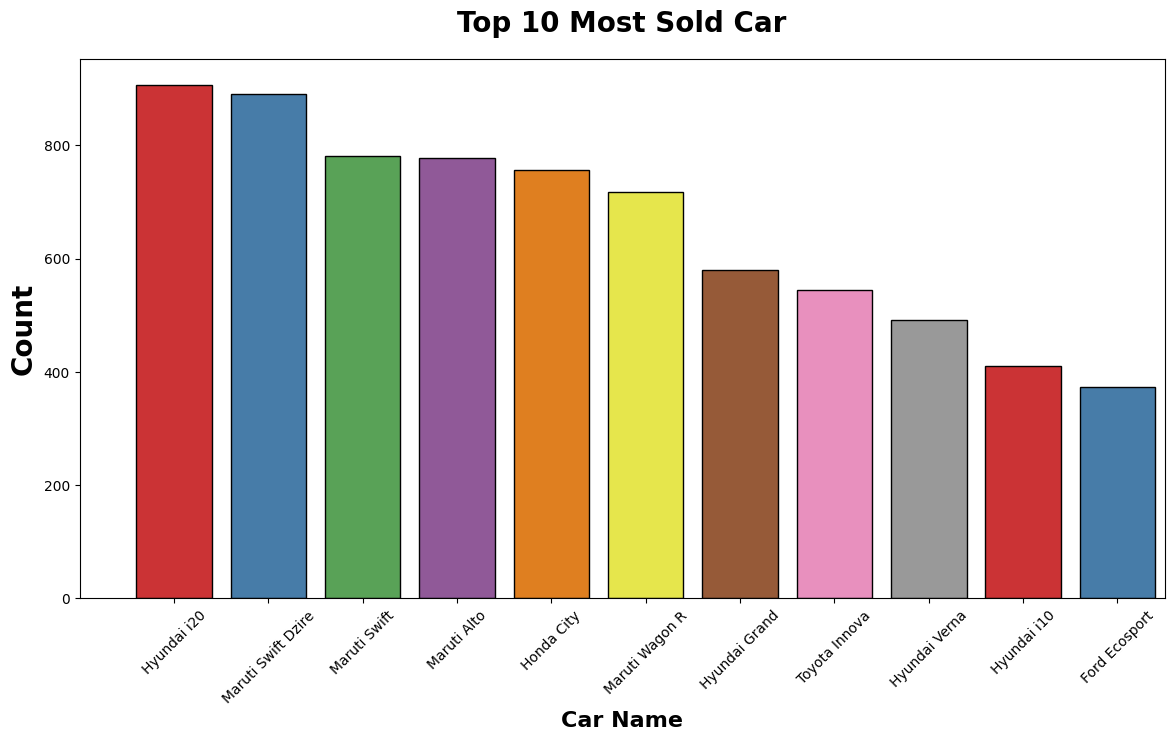

In [673]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [674]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


#### Conclusion

* The Most sold cars is Hyundai i20 and followed by Maruti Swift Dzire.
* Mean Price of Most Sold Car is 5.4 lakhs.
* This Feature has impact on the Target Variable.

## Most Sold Car Brand

In [675]:
print('-'*50)
print('Top 10 Most Sold Car Brand')
print('-'*50)

df.brand.value_counts()[0:10]

--------------------------------------------------
Top 10 Most Sold Car Brand
--------------------------------------------------


,count
brand,
Maruti,4992
Hyundai,2982
Honda,1485
Mahindra,1011
Toyota,793
Ford,790
Volkswagen,620
Renault,536
BMW,439


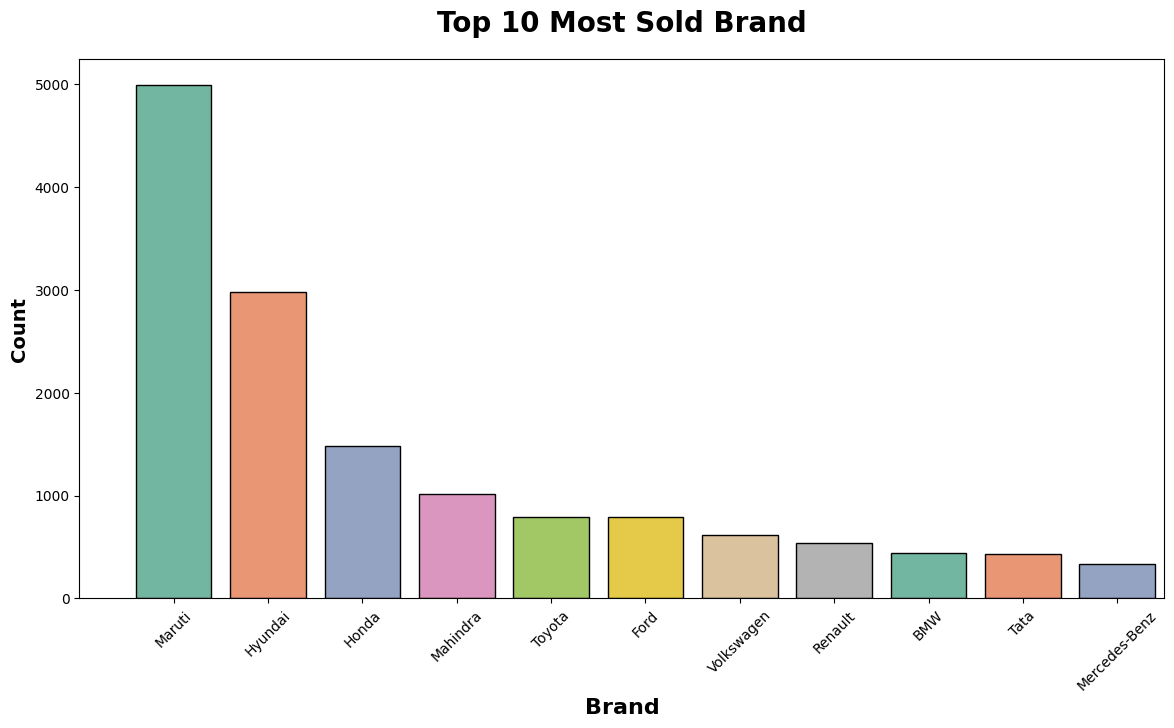

In [676]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [677]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


#### Conclusion
* As per the Chart Maruti has the most share of Ads in Used car and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

## Costlier Brand

In [678]:
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Brands')
print('-'*50)

brand

--------------------------------------------------
Top 10 Costlier Brands
--------------------------------------------------


,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


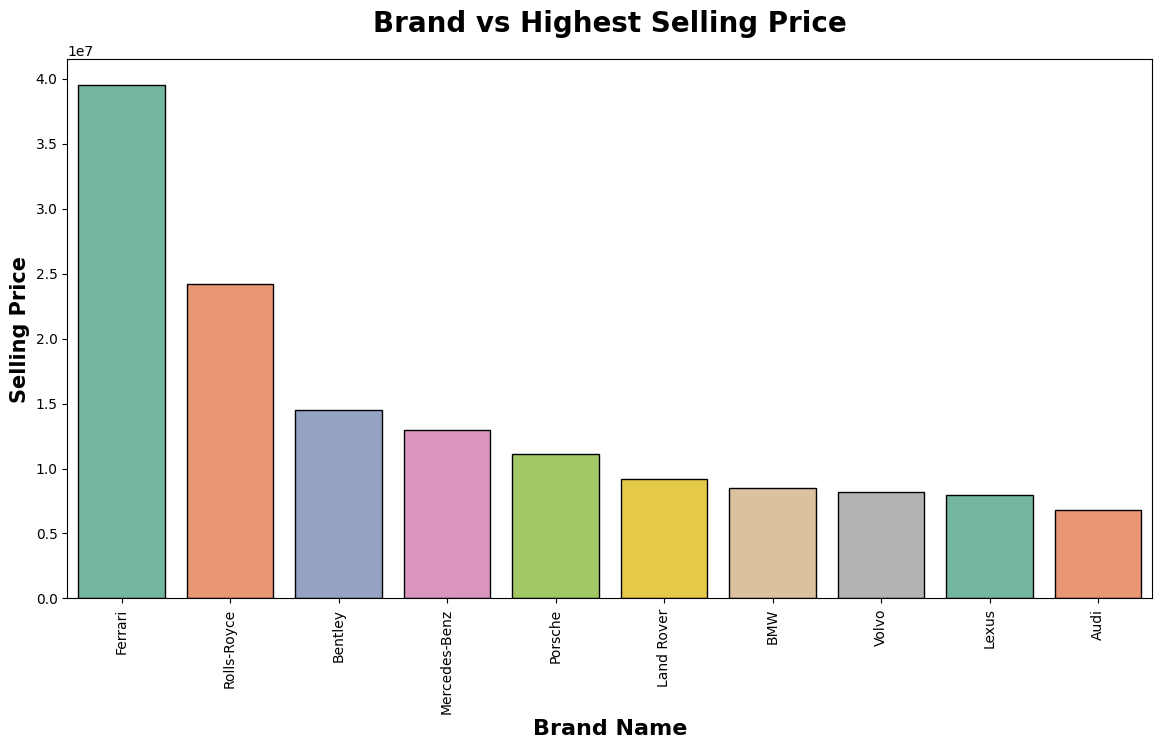

In [679]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.selling_price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Inference
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price.

## Costlier Car

In [680]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Cars')
print('-'*50)

car

--------------------------------------------------
Top 10 Costlier Cars
--------------------------------------------------


,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


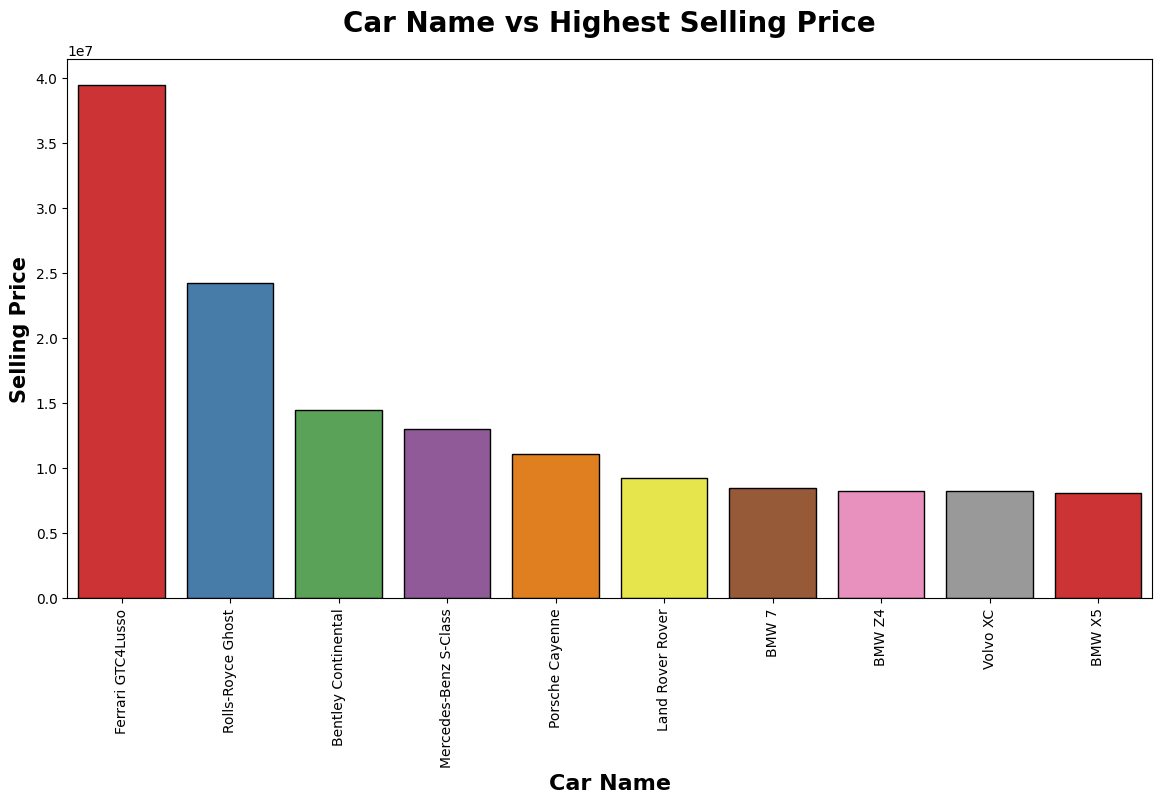

In [681]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Inference
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari other car has priced below 1.5cr.

## Most Mileage Car Brand

In [682]:
mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand')
print('-'*50)

mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand
--------------------------------------------------


,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


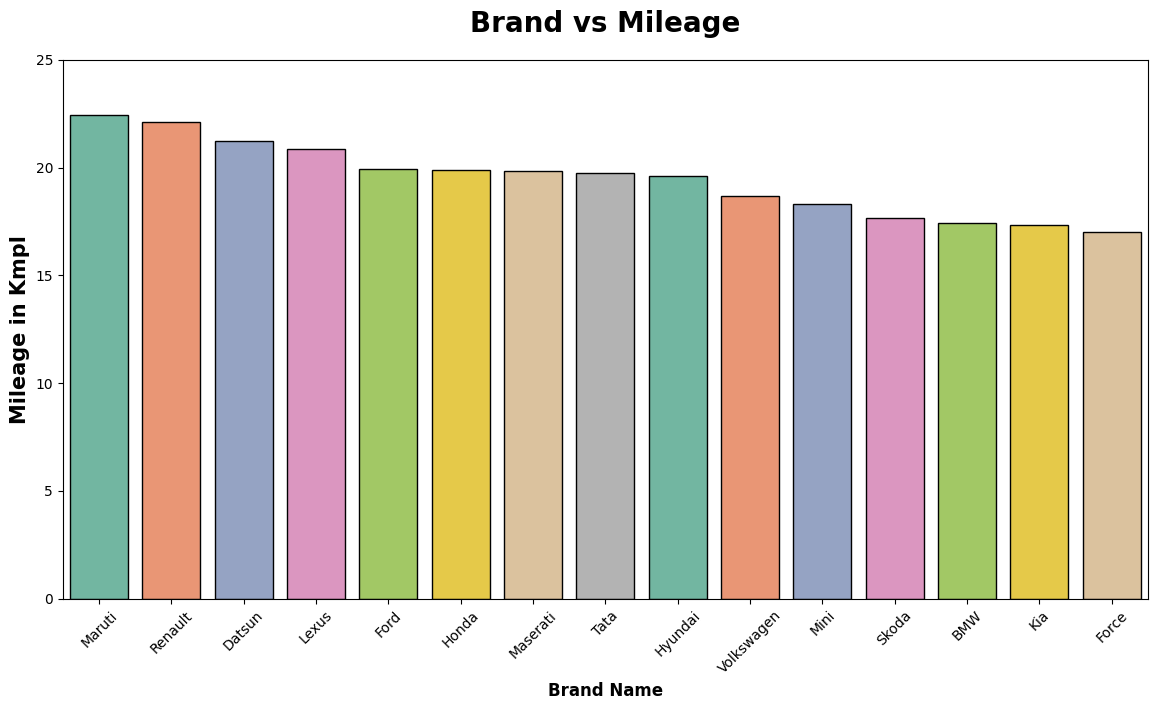

In [683]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

## Most Mileage Car

In [684]:
mileage_Car= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)

print('-'*50)
print('Most Mileage Car')
print('-'*50)

mileage_Car.to_frame()

--------------------------------------------------
Most Mileage Car
--------------------------------------------------


,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire ZXI,23.260000
Maruti Dzire LXI,23.260000
Ford Aspire,22.993846


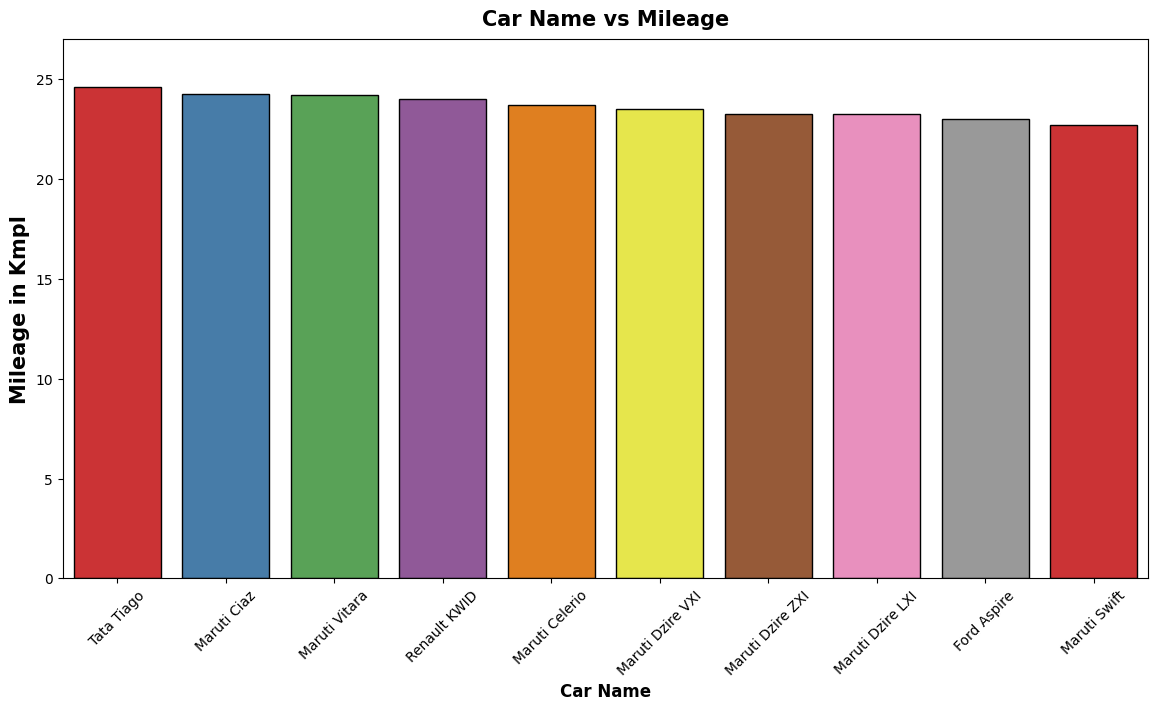

In [685]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_Car.index, y=mileage_Car.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=15, pad=10)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

## Kilometers Driven Vs Selling Price

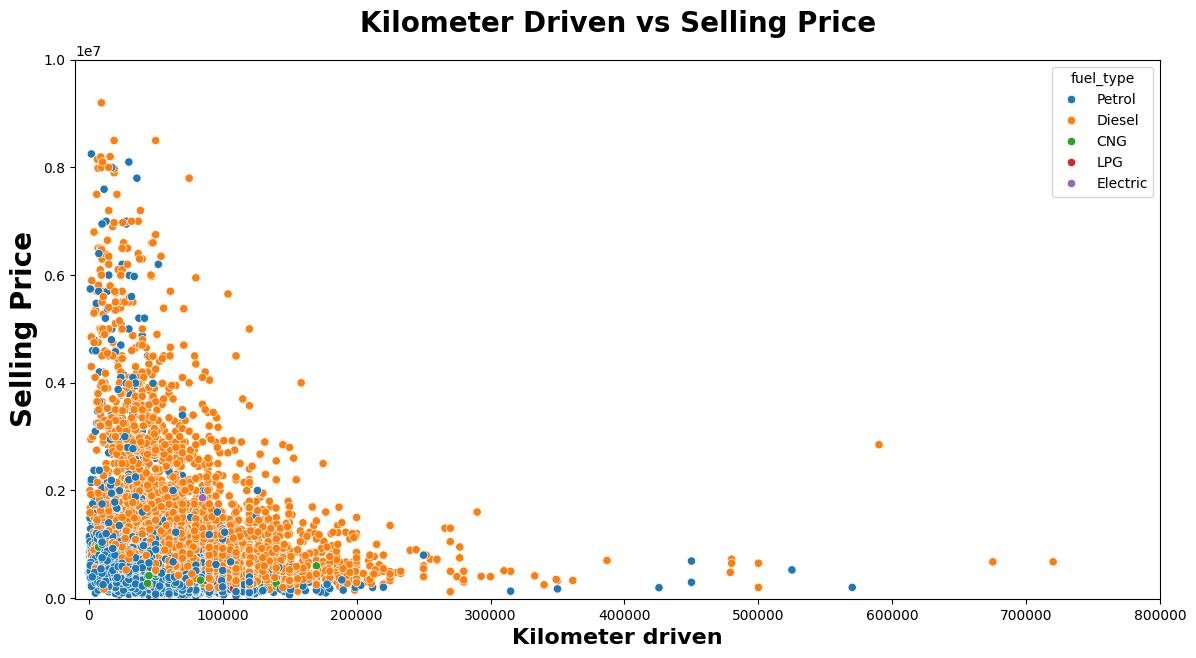

In [686]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

#### Conclusion
- Many Cars were sold with kms between 0 to 20k Kilometers
- Low Kms driven cars had more selling price compared to cars which had more kms driven.

## Fuel Type Vs Selling Price

In [687]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


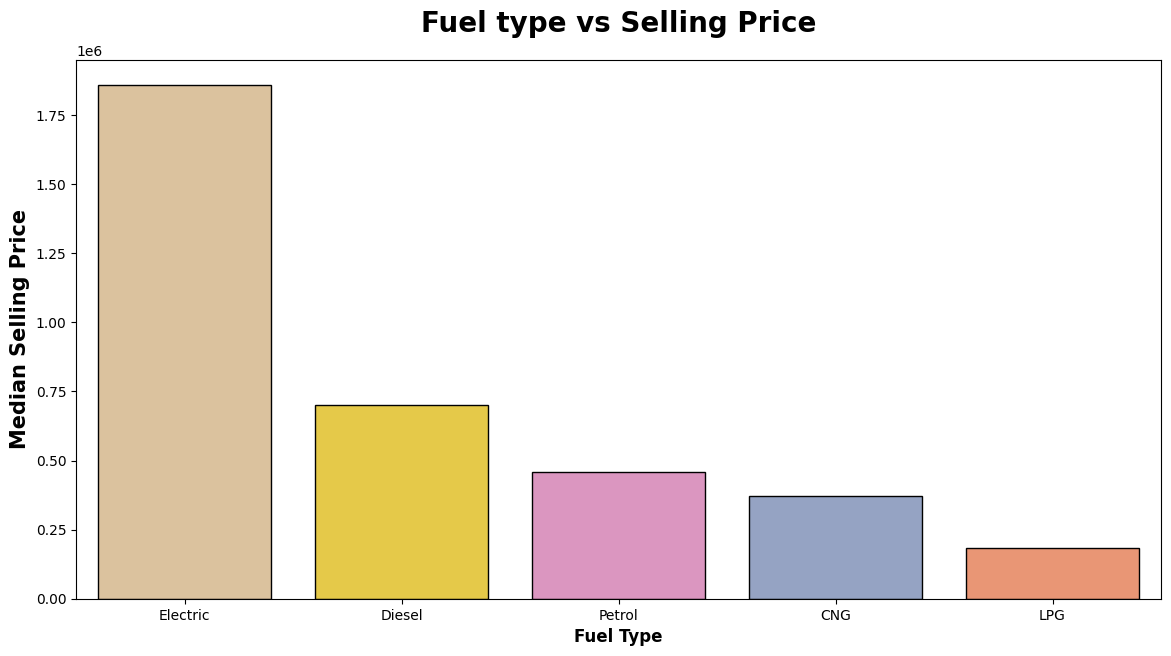

In [688]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### Conclusion
- Electric cars have highers selling average price.
- Followed by Diesel and Petrol.
- Fuel Type is also important feature for the Target variable.

## Most Sold Fuel type

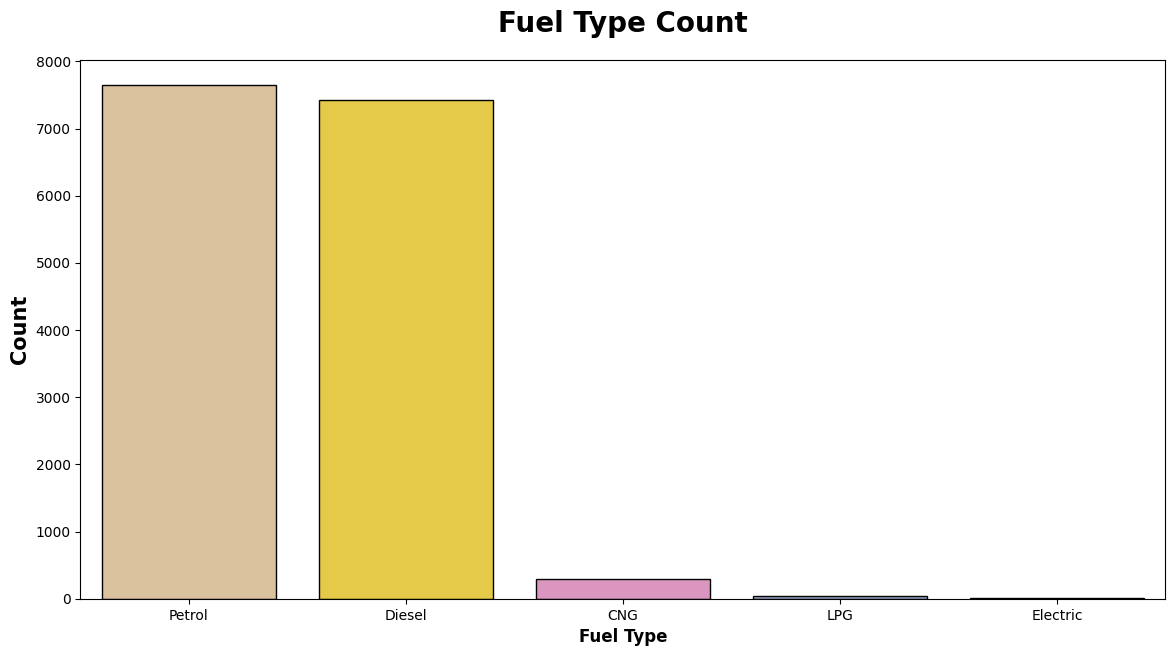

In [689]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### Conclusion
- Petrol and Diesel dominate the used car market in the website.
- The most sold fuel type Vechicle is Petrol.
- Followed by diesel and CNG and least sold is Electric

## Fuel Type Vs Mileage

In [690]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


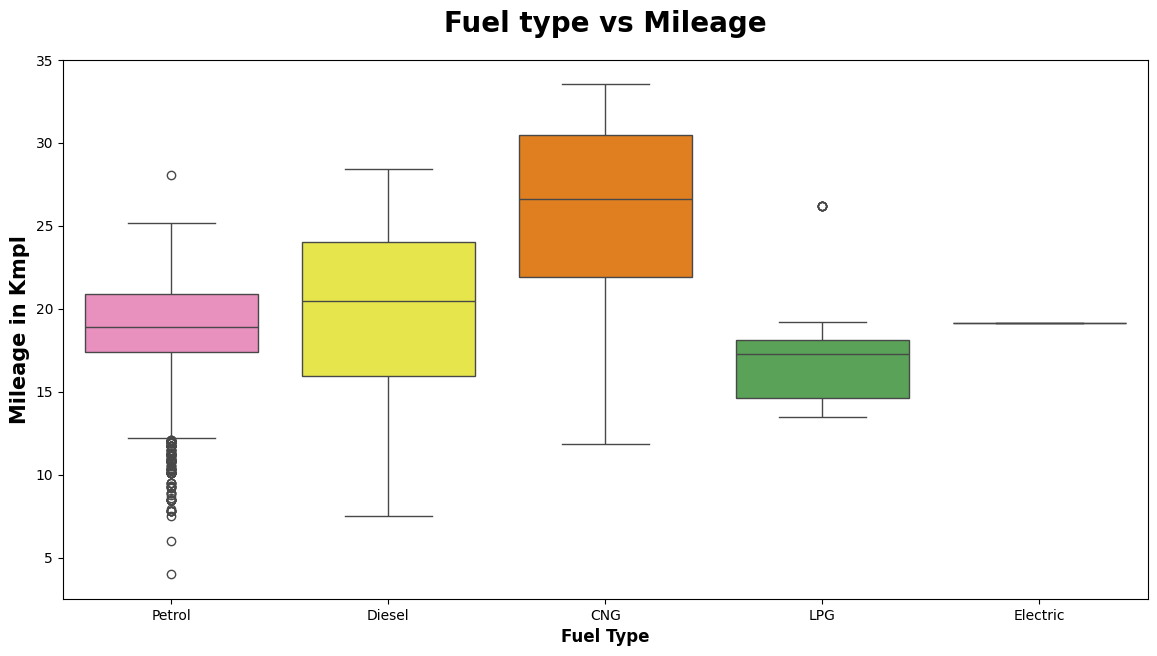

In [691]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

## Mileage vs Selling Price

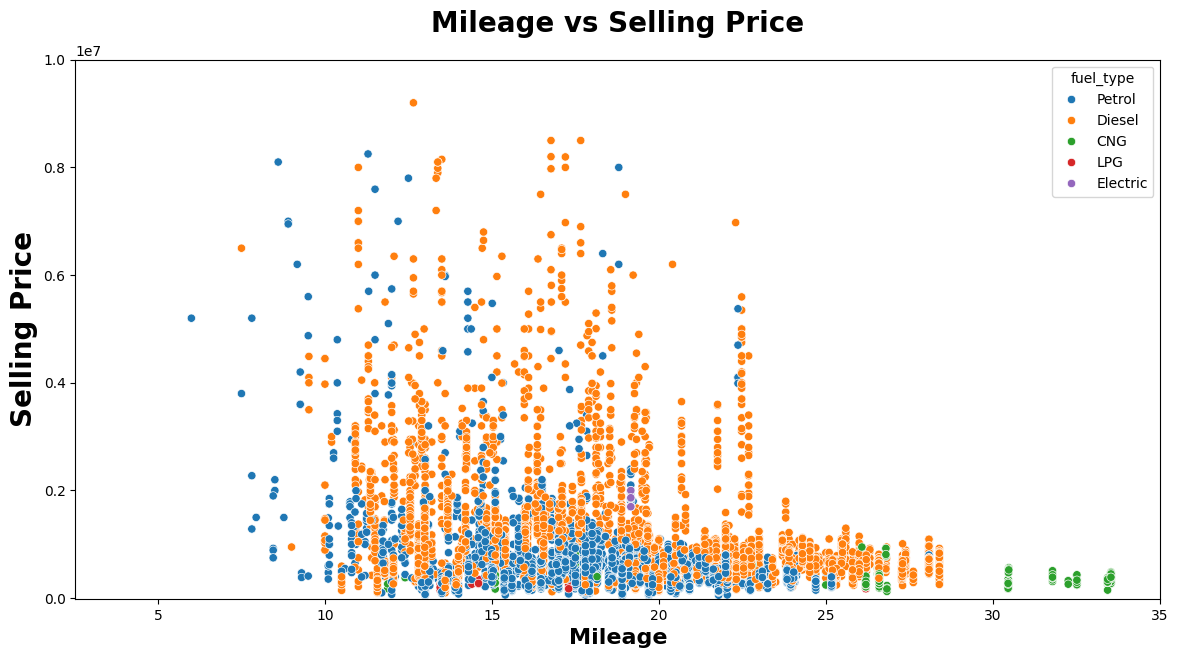

In [692]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

## Mileage Distribution

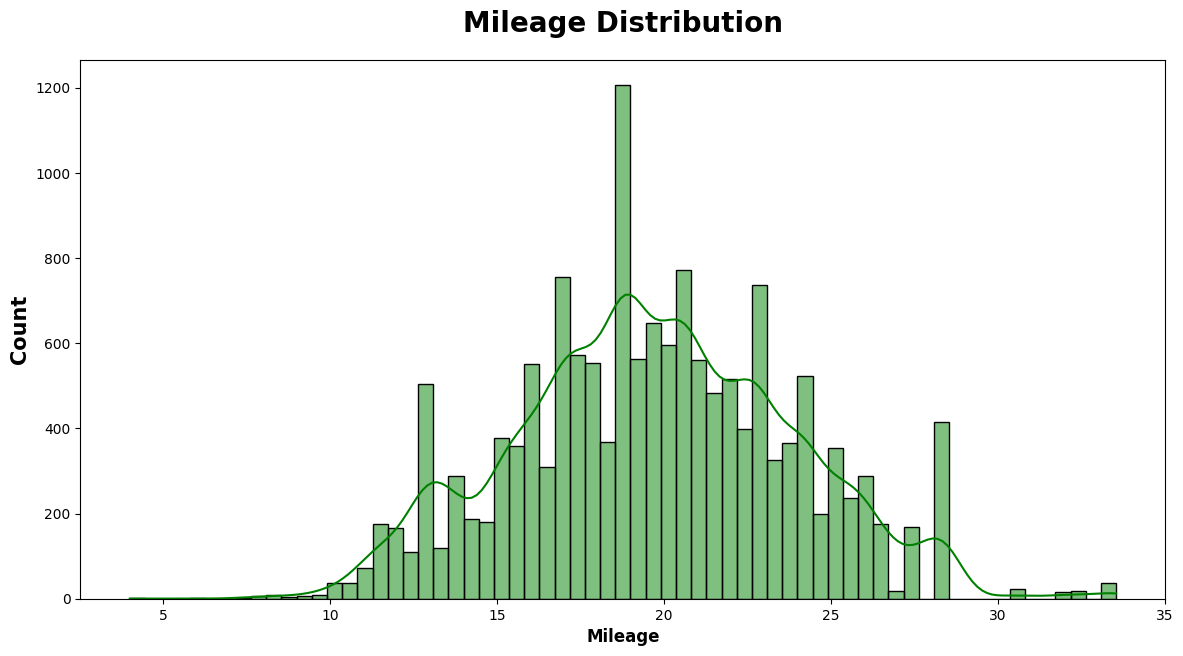

In [693]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

## Vehicle Age vs Selling Price

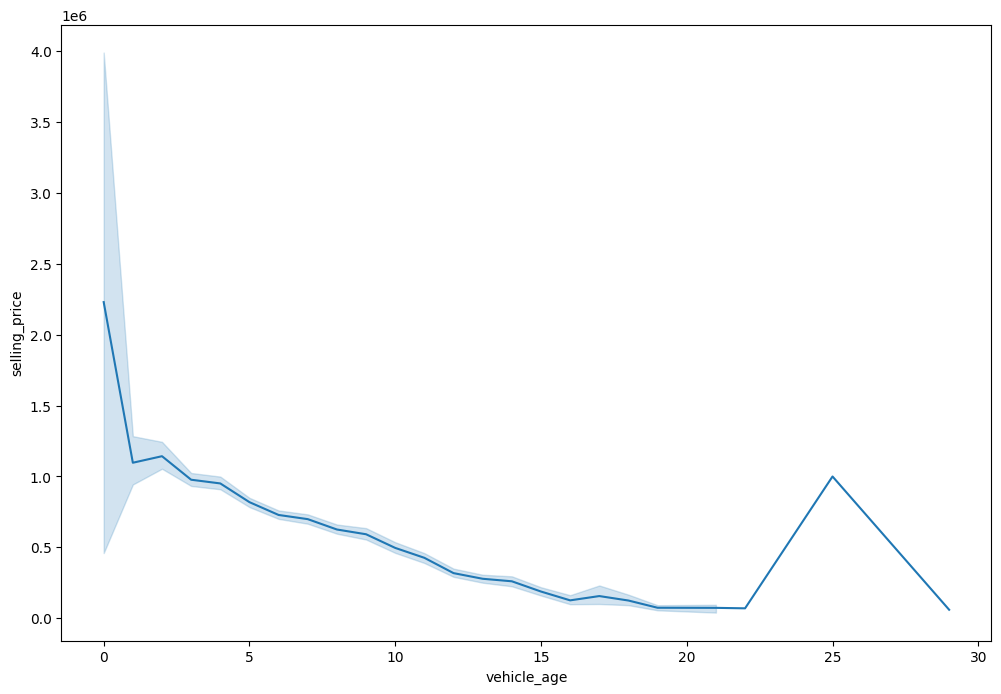

In [694]:
plt.subplots(figsize=(12,8))
sns.lineplot(x='vehicle_age',y='selling_price',data=df)
plt.show()

#### Conclusion
- As the Vehicle age increases the price also get reduced.
- Vehicle age has Negative impact on selling price


## Vehicle Age vs Mileage

In [695]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


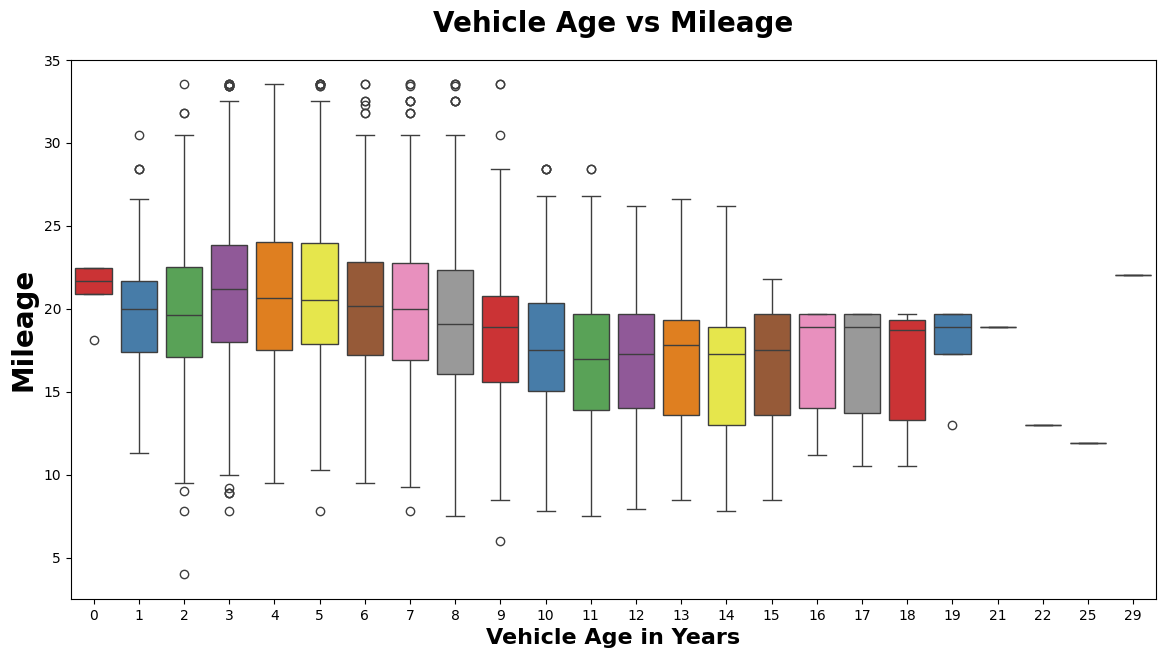

In [696]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

#### Conclusion
- As the Age of vehicle increases the median of mileage drops.
- Newer Vehicles have more mileage median older vehicle.

In [697]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Scorpio,18
Mahindra Bolero,18
Skoda Octavia,18
Mercedes-Benz E-Class,17
Honda CR-V,17


#### Conclusion
- Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

## Transmission Type Vs Count

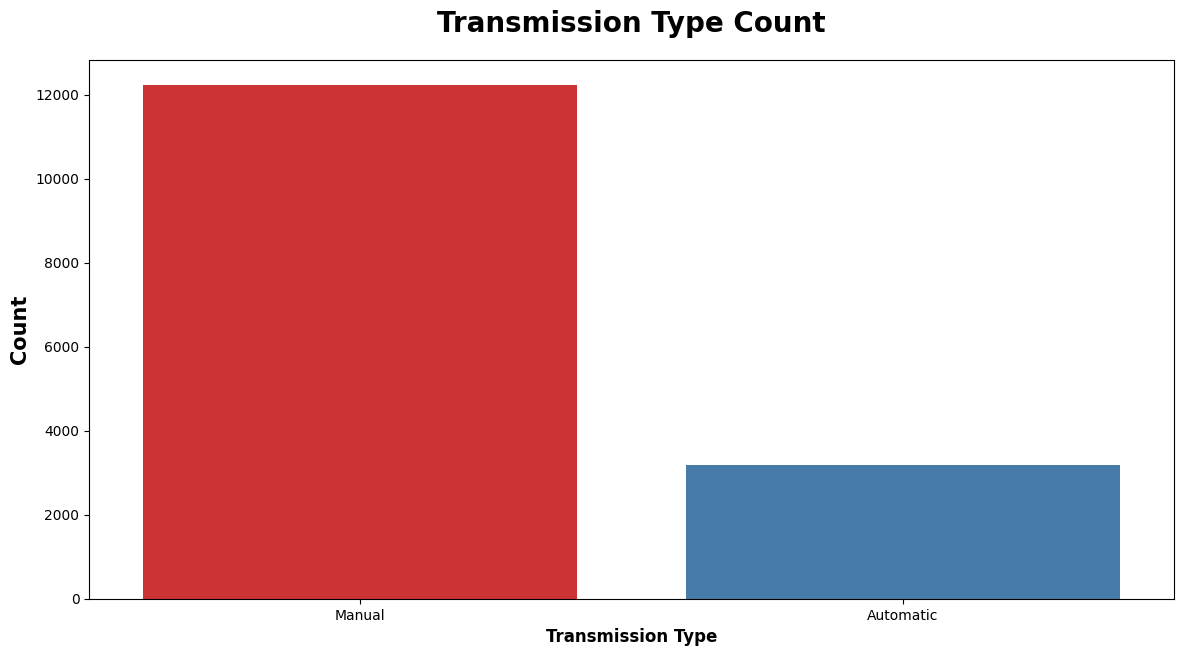

In [698]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

## Transmission Type Vs Selling Price

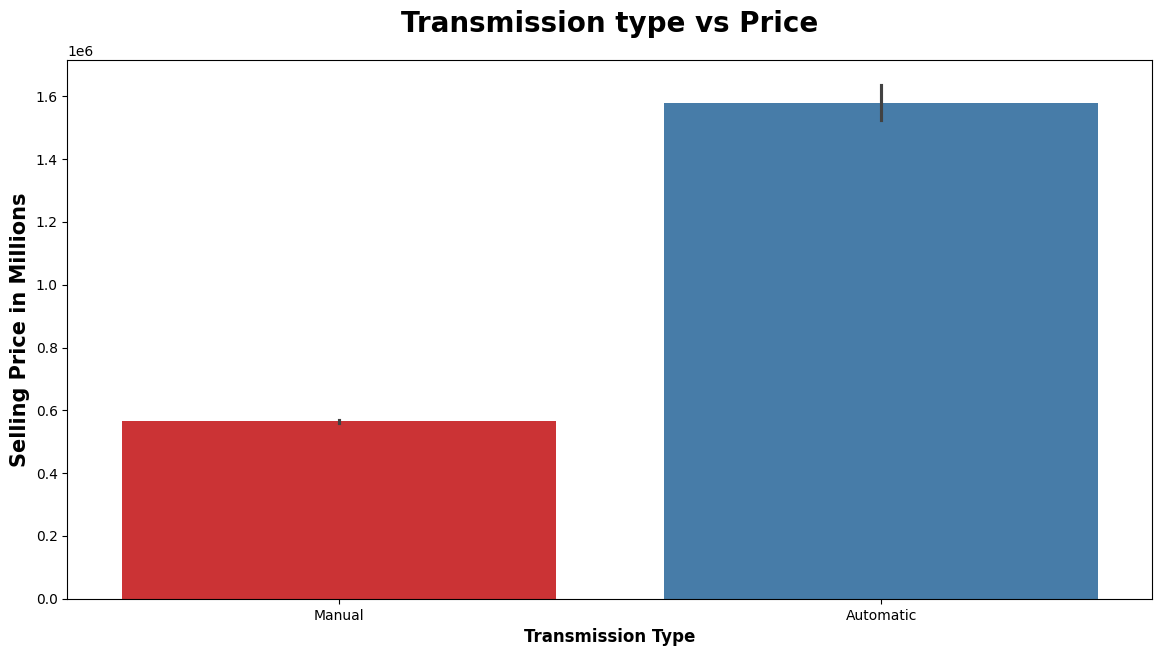

In [699]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

#### Conclusion
- Manual Transmission was found in most of the cars which was sold.
- Automatic cars have more selling price than manual cars.

## Seller Type  Vs Count

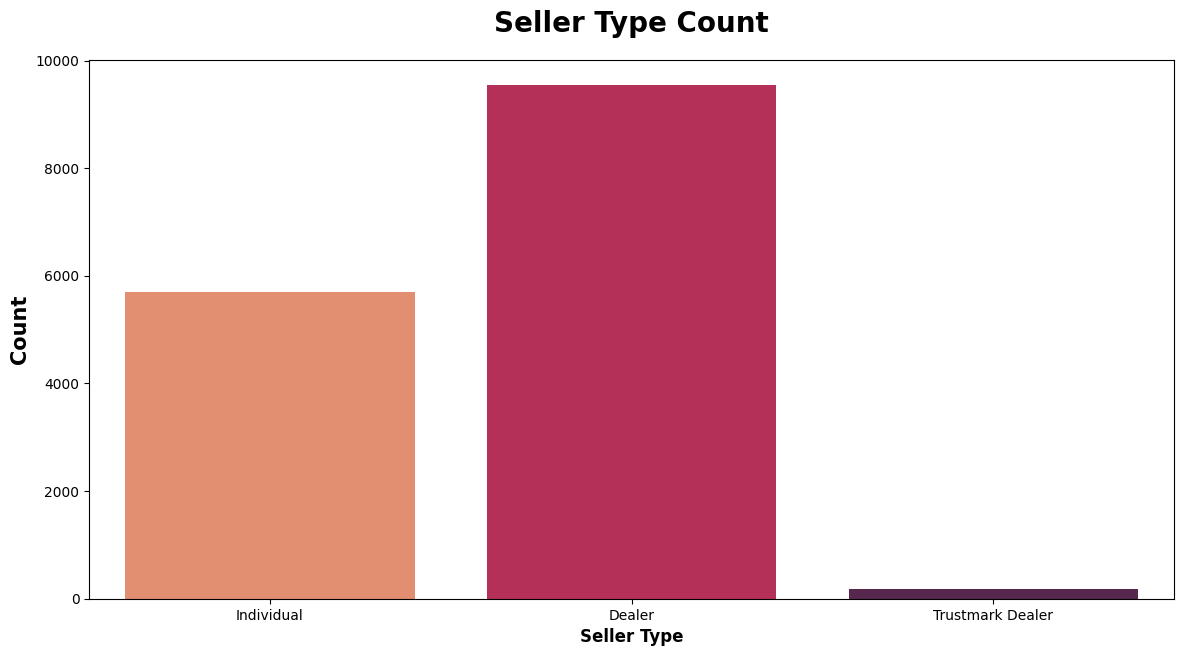

In [700]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Seller Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

## Seller Type vs Selling Price

In [701]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


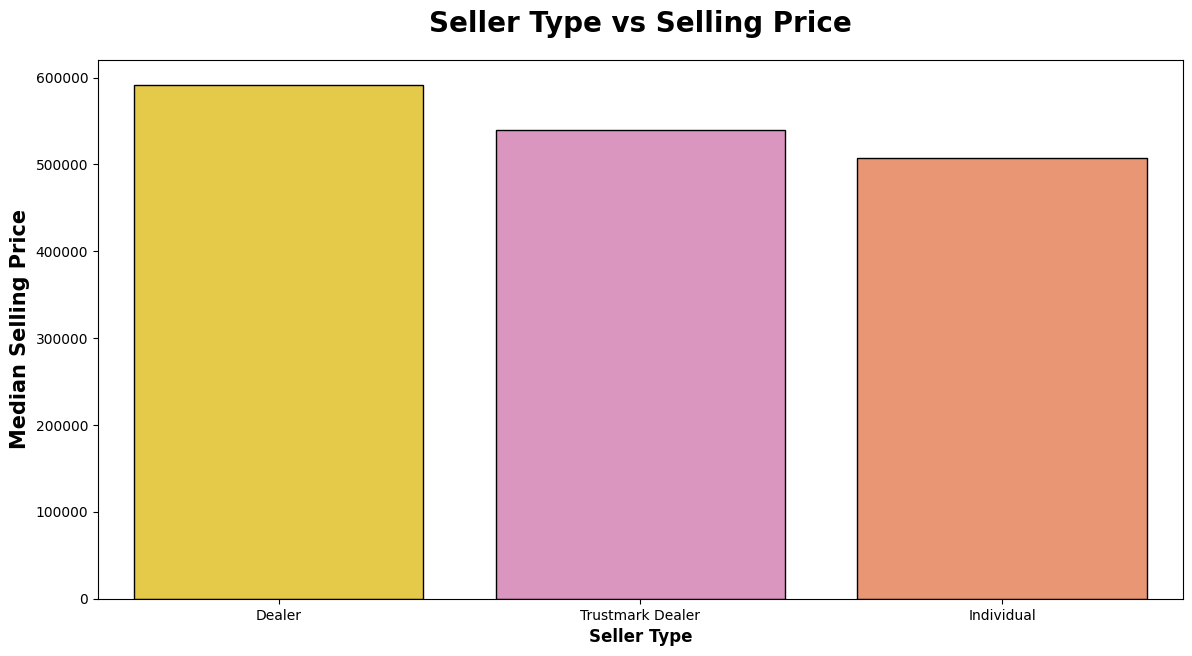

In [702]:
plt.subplots(figsize=(14,7))
sns.barplot(x=dealer.index, y=dealer.values, ec = "black", palette="Set2_r")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

#### Inference
- Dealers have put more ads on used car website.
- Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
- Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
- Dealers have more median selling price than Individual.

## Final Report

- The datatypes and Column names were right and there was 15411 rows and 13 columns
- The `selling_price` column is the target to predict. i.e Regression Problem.
- There are outliers in the `km_driven`, `enginer`, `selling_price`, and `max power`.
- Dealers are the highest sellers of the used cars.
- Skewness is found in few of the columns will check it after handling outliers.
- Vehicle age has negative impact on the price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
- We just need less data cleaning for this dataset.

# Feature Engineering

In [703]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## Removing unnecessary features

**Dropping `car_name` ,`brand` and `model`**

These features  are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the `car_name` ,`brand` and `model`, we can create a model that is more accurate and reliable.

In [704]:
# Creating copy of  original dataframe

df_model=df.copy()

df_model

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [705]:
df_model.drop(labels=['car_name','brand','model'],axis=1,inplace=True)

df_model

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


## Converting Categorical Columns into numerical

Using **`One Hot Encoding (get_dummies)`** to convert categorical variables to numerical

In [706]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [707]:
df_model.dtypes

,0
vehicle_age,int64
km_driven,int64
mileage,float64
engine,int64
max_power,float64
seats,int64
selling_price,int64
seller_type_Dealer,float64
seller_type_Individual,float64
seller_type_Trustmark Dealer,float64


## Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [708]:
X=df_model.drop('selling_price',axis=1)      # Feature Matrix
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [709]:
y=df_model['selling_price']    # Target Variable
y

,selling_price
0,120000
1,550000
2,215000
3,226000
4,570000
...,...
15406,250000
15407,925000
15408,425000
15409,1225000


## Checking for important features

In [710]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [711]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[1.75282013e-01 4.86096525e-02 5.51554440e-02 1.45179283e-01
 3.68040154e-01 1.50605046e-02 4.40204913e-03 4.35891533e-03
 2.39605510e-05 4.04466567e-05 8.60692985e-03 1.28032234e-05
 2.25758813e-06 1.81702709e-02 7.38452447e-02 8.32100708e-02]


### Visulization for feature importance

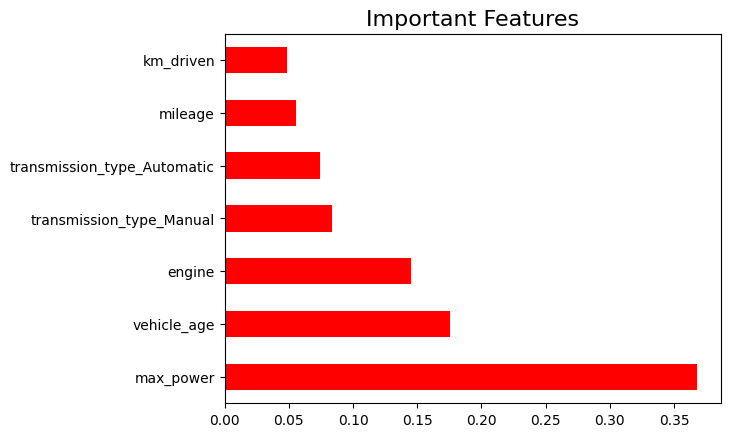

In [712]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

However, we will use all features for prediction

# 10) Model Building & Evaluation

###Importing important libraries for Model Building

In [713]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

###Train Test Split

In [714]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [715]:
from sklearn.model_selection import cross_val_score

# List of models
models = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]

# Storing results
results = []

for model in models:
    reg = model()
    reg.fit(X_train, y_train)

    # Predicting both train and test
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)

    # Checking Cross-validation scores (mean R²)
    cv_train_score = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2').mean()
    cv_test_score = cross_val_score(reg, X_test, y_test, cv=5, scoring='r2').mean()
    cv_full_score = cross_val_score(reg, X, y, cv=5, scoring='r2').mean()

    # Storing metrics
    results.append({
        'Model': model.__name__,
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train EVS': explained_variance_score(y_train, y_train_pred),
        'Test EVS': explained_variance_score(y_test, y_test_pred),
        'CV R² (Train)': cv_train_score,
        'CV R² (Test)': cv_test_score,
        'CV R² (Full)': cv_full_score,
    })

# Creating a DataFrame for comparison
results_df = pd.DataFrame(results)

# Sorting by Test R² descending
results_df = results_df.sort_values(by='Test R²', ascending=False)

# Showing results
results_df


,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R²,Test R²,Train EVS,Test EVS,CV R² (Train),CV R² (Test),CV R² (Full)
2,RandomForestRegressor,1.751261e+10,5.750475e+10,132335.236749,239801.484389,0.978407,0.923610,0.978407,0.923618,0.870233,0.892839,0.873560
1,DecisionTreeRegressor,4.383209e+08,1.030713e+11,20936.115269,321047.252271,0.999460,0.863079,0.999460,0.863097,0.796569,0.787870,0.767875
3,Ridge,3.070953e+11,2.520957e+11,554161.778287,502091.313977,0.621354,0.665115,0.621354,0.665118,0.628105,0.659801,0.632699
4,Lasso,3.070946e+11,2.520990e+11,554161.205252,502094.660531,0.621355,0.665110,0.621355,0.665113,0.628105,0.659811,0.632697
0,LinearRegression,3.070946e+11,2.520995e+11,554161.201016,502095.143462,0.621355,0.665109,0.621355,0.665112,0.628105,0.659825,0.632697


**Interpretation**

**Random Forest Regressor:**

* Achieves the highest R² score on the test set (0.92), suggesting excellent generalization.

* The lowest RMSE on the test set (237k) confirms minimal prediction error.

* While the training R² is very high (0.98), the drop to 0.87 in cross-validation shows slight overfitting but still within a good generalization margin.

* This model is currently the best performer.


**Decision Tree Regressor:**

* Nearly perfect R² on the training set (0.999) but drops to 0.86 on the test set.

* CV scores also drop, indicating high overfitting.

* Should be avoided unless further regularized or pruned.

**Ridge, Lasso, and Linear Regression:**

* All three models yield similar and lower R² scores (~0.66 on test).

* High error (RMSE ~500k) and consistently poor CV scores indicate underfitting.

* They fail to capture the non-linear relationships likely present in the dataset.



### Let's Try to Enhance Rnadom Forest Performance Using Random Search CV

In [716]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 50, 60],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)

# Fiting on training data
random_search.fit(X_train, y_train)

# Best estimator from tuning
best_rf = random_search.best_estimator_

# Predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Cross-validation R2 scores
cv_train_r2 = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2').mean()
cv_test_r2 = cross_val_score(best_rf, X_test, y_test, cv=5, scoring='r2').mean()
cv_full_r2 = cross_val_score(best_rf, X, y, cv=5, scoring='r2').mean()

# Storing results
rf_results = {
    'Model': 'RandomForest (Tuned)',
    'Train MSE': mean_squared_error(y_train, y_train_pred),
    'Test MSE': mean_squared_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Train EVS': explained_variance_score(y_train, y_train_pred),
    'Test EVS': explained_variance_score(y_test, y_test_pred),
    'CV R² (Train)': cv_train_r2,
    'CV R² (Test)': cv_test_r2,
    'CV R² (Full)': cv_full_r2
}

# Converting to DataFrame
rf_results_df = pd.DataFrame([rf_results])

# Output best params and model results
print("Best Parameters:\n", random_search.best_params_)
print("\nTuned RandomForest Performance:\n")
print(rf_results_df)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:
 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Tuned RandomForest Performance:

                  Model     Train MSE      Test MSE     Train RMSE  \
0  RandomForest (Tuned)  4.290688e+10  5.128441e+10  207139.766975   

       Test RMSE  Train R²   Test R²  Train EVS  Test EVS  CV R² (Train)  \
0  226460.604411  0.947096  0.931873   0.947097  0.931874         0.8622   

   CV R² (Test)  CV R² (Full)  
0      0.885624      0.870252  


In [717]:
rf_results_df

,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R²,Test R²,Train EVS,Test EVS,CV R² (Train),CV R² (Test),CV R² (Full)
0,RandomForest (Tuned),4.290688e+10,5.128441e+10,207139.766975,226460.604411,0.947096,0.931873,0.947097,0.931874,0.8622,0.885624,0.870252


**Interpretation**
1. Performance Boost: After hyperparameter tuning, the Test R² improved from 0.9249 → 0.9319, confirming better generalization performance.

2. Generalization:

* The Train-Test R² gap has reduced from the previous model.

* The Cross-Validation R² scores are more consistent across training, testing, and full datasets (all ~0.87-0.89).

3. Lower Error: Test RMSE has reduced (237k → 226k), indicating improved prediction accuracy.

4. Well-Tuned: The selected hyperparameters (like max_depth=60, min_samples_split=3) contribute to balancing bias-variance trade-off effectively.

In [718]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Correct model initialization with keyword arguments
model = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=50,
    random_state=42
)

# 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Output results
print("Cross-validated R² scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores))


Cross-validated R² scores: [0.92634235 0.69927411 0.92529681 0.87301179 0.92733601]
Mean R²: 0.8702522142919811


###Let's Try to Enhance Performance of LinearRegression, Ridge, Lasso

In [719]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
import numpy as np

# -------------------------------
# 1. Define features to transform
# -------------------------------
columns_to_transform = ['km_driven', 'engine', 'max_power', 'seats', 'selling_price']

# -------------------------------
# 2. Apply Yeo-Johnson Transformation
# -------------------------------
pt = PowerTransformer(method='yeo-johnson')
df_transformed = df_model.copy()
df_transformed[columns_to_transform] = pt.fit_transform(df_transformed[columns_to_transform])

# -------------------------------
# 3. Feature/Target Split
# -------------------------------
X = df_transformed.drop('selling_price', axis=1)
y = df_transformed['selling_price']

# -------------------------------
# 4. Standardize Features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 5. Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# 6. Models to Compare
# -------------------------------
models = [LinearRegression(), Ridge(), Lasso()]
results = []

for model in models:
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Cross-validation scores
    cv_train_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    cv_test_r2 = cross_val_score(model, X_test, y_test, cv=5, scoring='r2').mean()
    cv_full_r2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()

    results.append({
        'Model': model.__class__.__name__,
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train EVS': explained_variance_score(y_train, y_train_pred),
        'Test EVS': explained_variance_score(y_test, y_test_pred),
        'CV R² (Train)': cv_train_r2,
        'CV R² (Test)': cv_test_r2,
        'CV R² (Full)': cv_full_r2
    })

# -------------------------------
# 7. Display Results
# -------------------------------
results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False)
results_df


,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R²,Test R²,Train EVS,Test EVS,CV R² (Train),CV R² (Test),CV R² (Full)
0,LinearRegression,0.143050,0.158418,0.378219,0.398017,0.854877,0.850138,0.854877,0.850260,0.854419,0.848404,0.848428
1,Ridge,0.143050,0.158419,0.378219,0.398018,0.854877,0.850137,0.854877,0.850259,0.854419,0.848408,0.848429
2,Lasso,0.985718,1.057116,0.992833,1.028161,0.000000,-0.000021,0.000000,0.000000,-0.000660,-0.001712,-0.012494


**1. Linear Regression & Ridge Both are performing equally well.**

* R² ≈ 0.85, meaning your model explains about 85% of the variance in selling prices after transformation.

* RMSE of ~0.398 on standardized data — this is quite decent assuming target variable transformation has normalized the scale.

* Ridge isn’t improving much over LinearRegression → this suggests no multicollinearity issues or that regularization isn’t needed here.

**2. Lasso Regression is failing**

* R² ≈ ~0, meaning the model is not explaining any variance.

* This happens because Lasso penalizes and can shrink many coefficients to zero.

* In our case, it seems Lasso is dropping all features (or nearly all), hence performing like a mean predictor because default alpha=1.0 is too strong for Lasso which over-penalizes and wipes out important coefficients.


In [720]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score



degrees = [2, 3]
models = [LinearRegression(), Ridge(), Lasso()]
results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    for model in models:
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Cross-validation on Train, Test, and Full dataset
        cv_train = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
        cv_test = cross_val_score(model, X_test, y_test, cv=5, scoring='r2').mean()
        cv_full = cross_val_score(model, X_poly, y, cv=5, scoring='r2').mean()

        results.append({
            'Model': model.__class__.__name__ + f" (Poly {degree})",
            'Train MSE': mean_squared_error(y_train, y_train_pred),
            'Test MSE': mean_squared_error(y_test, y_test_pred),
            'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'Train R²': r2_score(y_train, y_train_pred),
            'Test R²': r2_score(y_test, y_test_pred),
            'Train EVS': explained_variance_score(y_train, y_train_pred),
            'Test EVS': explained_variance_score(y_test, y_test_pred),
            'CV R² (Train)': cv_train,
            'CV R² (Test)': cv_test,
            'CV R² (Full)': cv_full
        })

# Convert to DataFrame and sort
results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False)
results_df


,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R²,Test R²,Train EVS,Test EVS,CV R² (Train),CV R² (Test),CV R² (Full)
4,Ridge (Poly 3),0.093065,0.109041,0.305066,0.330213,0.905586,0.896849,0.905586,0.897061,0.136592,0.861865,0.481004
3,LinearRegression (Poly 3),0.093019,0.122563,0.304990,0.350089,0.905633,0.884057,0.905633,0.884247,-0.936715,-9.076612,-8.468824
0,LinearRegression (Poly 2),0.111304,0.123186,0.333623,0.350978,0.887083,0.883468,0.887083,0.883713,0.880210,0.872976,0.875715
1,Ridge (Poly 2),0.111304,0.123186,0.333623,0.350979,0.887083,0.883467,0.887083,0.883713,0.880209,0.878626,0.875715
5,Lasso (Poly 3),0.599254,0.633809,0.774115,0.796121,0.392063,0.400423,0.392063,0.400439,0.386892,0.447735,0.390904
2,Lasso (Poly 2),0.979496,1.048953,0.989695,1.024184,0.006312,0.007701,0.006312,0.007719,0.005204,0.007581,-0.007621


**Model Performance Summary**

**Ridge (Polynomial Degree = 3)**

* Test R²: 0.8968

* CV R² (Full): 0.481

* Best generalization performance.

* Handles high-degree polynomial features well with regularization.

**LinearRegression (Polynomial Degree = 3)**

* Test R²: 0.8840

* CV R² (Full): -8.4688 & Severe overfitting.

* Poor cross-validation performance – not reliable for unseen data.

**Ridge & LinearRegression (Polynomial Degree = 2)**

* Test R²: ~0.883

* CV R² (Full): ~0.875

* Very stable performance.

* Less complex than degree=3, and still good generalization.

**Lasso (Degree 2 & 3)**

* Test R²: Low

* CV R² (Full): Low or negative

* Underfitting — likely due to excessive feature elimination.

* Not suitable for capturing complex relationships.





# Selection of Best Model & Hyperparameter Tuning



As we can see, the **tuned RandomForestRegressor** has consistently outperformed all other models in terms of both training and test performance, while also avoiding overfitting. The test R² of the tuned model (0.932) is higher than the pre-tuned version (0.925) and provides a better indication of how well the model generalizes to unseen data.

Additionally, the cross-validation (CV) R² scores for the tuned RandomForest model indicate good stability and consistent performance across both train and test datasets, with CV R² values of 0.862 (train), 0.886 (test), and 0.870 (full). These metrics confirm that the tuned model is well-regularized and generalizes effectively, making it the most balanced and reliable model for deployment.

Therefore, given its superior performance, avoidance of overfitting, and strong generalization capabilities, we will proceed with the tuned RandomForestRegressor for deployment, as it offers the most balanced and robust results across all datasets.

# Generating Pickle File- Saving Trained Model

In [721]:
import pickle

# Save the tuned RandomForestRegressor model
with open('random_forest_tuned_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)
